visualize benchmarking compact models here

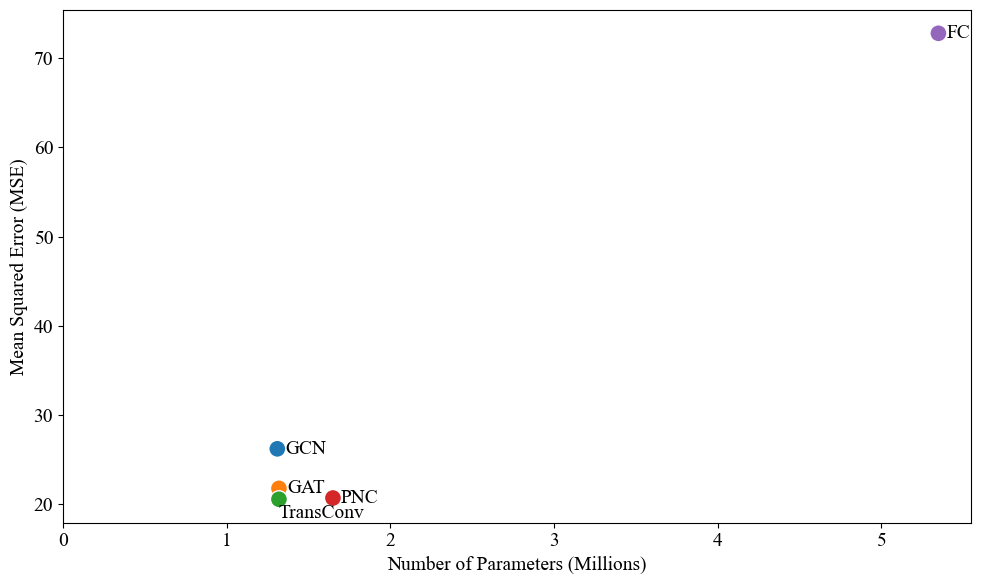

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl

# Font
mpl.rcParams['font.family'] = 'Times New Roman'

# Data
data = {
    "Model": ["GCN", "GAT", "TransConv", "PNC", "FC"],
    "Params (M)": [1.31, 1.32, 1.32, 1.65, 5.35],
    "MSE": [26.22, 21.79, 20.57, 20.71, 72.77],
    "Inference Time (ms)": [19.05, 22.45, 17.18, 30.45, 0.46]
}
df = pd.DataFrame(data)

# Shared palette
palette = sns.color_palette("tab10", n_colors=len(df))
color_dict = dict(zip(df["Model"], palette))

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    data=df,
    x="Params (M)",
    y="MSE",
    hue="Model",
    palette=color_dict,
    s=150,
    legend=False
)

for i in range(df.shape[0]):
    x = df["Params (M)"][i] + 0.05
    y = df["MSE"][i]
    label = df["Model"][i]
    
    if label == "TransConv":
        ax.text(x - 0.05, y - 0.5, label, fontsize=14, ha='left', va='top')  # below the point
    else:
        ax.text(x, y, label, fontsize=14, ha='left', va='center')     # default (right, center aligned)

ax.set_xlabel("Number of Parameters (Millions)", fontsize=14)
ax.set_ylabel("Mean Squared Error (MSE)", fontsize=14)
ax.tick_params(labelsize=14)
ax.set_xlim(left=0)

plt.tight_layout()
plt.savefig("results/model_complexity_vs_mse.png", dpi=300)
plt.show()


/tmp/ipykernel_1859253/3677855225.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


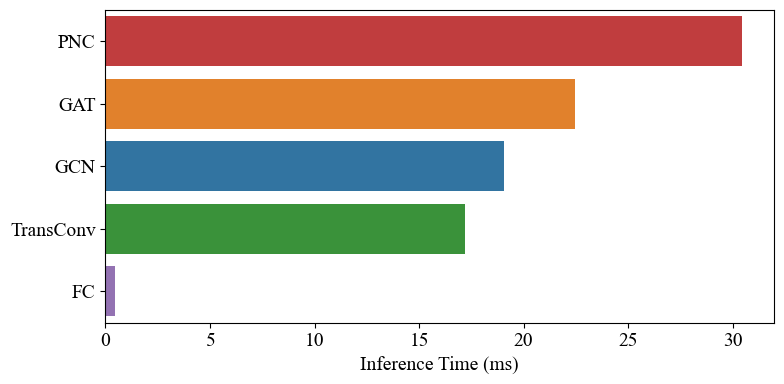

In [6]:
plt.figure(figsize=(8, 4))

df_sorted = df.sort_values("Inference Time (ms)", ascending=False)  # Descending sort

ax = sns.barplot(
    x="Inference Time (ms)",
    y="Model",
    data=df_sorted,
    palette=color_dict
)

ax.set_xlabel("Inference Time (ms)", fontsize=14)
ax.set_ylabel("")
ax.tick_params(labelsize=14)
plt.tight_layout()
plt.savefig("results/inference_time_by_model.png", dpi=300)
plt.show()

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from scipy.optimize import curve_fit

# Set font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# Data from the table with added layer information
data = {
    # 'Pyramid (512)': {'params': 1.06, 'mse': 23.67, 'layers': 3, 'hidden_dim': 512},
    'Pyramid (256)': {'params': 0.33, 'mse': 21.72, 'layers': 5, 'hidden_dim': 256},
    # 'Pyramid (512) (from Table)': {'params': 1.32, 'mse': 20.57, 'layers': 5, 'hidden_dim': 512},
    'Pyramid (256) (2 Heads) + GN': {'params': 0.33, 'mse': 19.53, 'layers': 5, 'hidden_dim': 256},
    'Pyramid (256) + GN': {'params': 0.35, 'mse': 18.25, 'layers': 7, 'hidden_dim': 256},
    'Pyramid (256) + GN (9L)': {'params': 0.43, 'mse': 18.09, 'layers': 9, 'hidden_dim': 256},
    'Pyramid (256) + GN (11L)': {'params': 0.76, 'mse': 15.99, 'layers': 11, 'hidden_dim': 256},
    'Pyramid (256) + GN (13L)': {'params': 0.78, 'mse': 16.24, 'layers': 13, 'hidden_dim': 256},
    'Pyramid (384) + GN': {'params': 1.58, 'mse': 14.30, 'layers': 15, 'hidden_dim': 384},
    'Pyramid (512) + GN': {'params': 3.15, 'mse': 13.32, 'layers': 17, 'hidden_dim': 512},
    'Uniform (192) + Res. + GN': {'params': 3.28, 'mse': 11.16, 'layers': 23, 'hidden_dim': 192},
    'Wide Pyramid (512) + Res. + GN': {'params': 20.34, 'mse': 10.52, 'layers': 27, 'hidden_dim': 512},
    'Uniform (256) + Res. + GN': {'params': 7.92, 'mse': 11.26, 'layers': 31, 'hidden_dim': 256},
    'Wide Pyramid (256) + Res. + GN': {'params': 12.75, 'mse': 10.29, 'layers': 54, 'hidden_dim': 256}
}

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate point sizes based on hidden dimensions
hidden_dims = np.array([v['hidden_dim'] for v in data.values()])
# Scale sizes to be between 50 and 300
sizes = 50 + (hidden_dims / hidden_dims.max()) * 250

# Calculate layer-based colors
layer_values = np.array([v['layers'] for v in data.values()])
# Normalize layer values to [0, 1]
layer_norm = (layer_values - layer_values.min()) / (layer_values.max() - layer_values.min())
# Create a colormap from light to dark blue
layer_cmap = LinearSegmentedColormap.from_list("layer_cmap", ["#add8e6", "#00008b"])
# Map normalized layer values to colors
layer_colors = [layer_cmap(val) for val in layer_norm]

# Plot each point with different styles based on architecture
for (model_name, values), color, size in zip(data.items(), layer_colors, sizes):
    ax.scatter(values['params'], values['mse'], 
              color=color,
              marker='D',  # Diamond for all points
              s=size,  # size based on hidden dimension
              alpha=0.8)

# Add horizontal line at MSE = 8.57 with label
line = ax.axhline(y=8.57, color='grey', linestyle='--', alpha=0.7, 
           label='Estimation of simulation noise')

# Customize the plot
ax.set_xlabel('Number of Parameters (in Millions)', fontsize=12)
ax.set_ylabel('MSE', fontsize=12)

# Set axis limits to start from 0
ax.set_xlim(0, max(v['params'] for v in data.values()) * 1.1)
ax.set_ylim(0, max(v['mse'] for v in data.values()) * 1.1)

# Create dummy scatter plots for the layer color legend
min_layers = min(layer_values)
max_layers = max(layer_values)
min_layer_point = ax.scatter([], [], s=100, color="#add8e6", alpha=0.8, marker='D', label=f'layers = {min_layers}')
max_layer_point = ax.scatter([], [], s=100, color="#00008b", alpha=0.8, marker='D', label=f'layers = {max_layers}')

# Create dummy scatter plots for the size legend
min_dim = min(hidden_dims)
max_dim = max(hidden_dims)
min_size = 50 + (min_dim / max_dim) * 250
max_size = 300
min_point = ax.scatter([], [], s=min_size, color='gray', alpha=0.8, marker='D', label=f'hidden dim = {min_dim}')
max_point = ax.scatter([], [], s=max_size, color='gray', alpha=0.8, marker='D', label=f'hidden dim = {max_dim}')

# Extract x and y data
params = np.array([v['params'] for v in data.values()])
mse = np.array([v['mse'] for v in data.values()])

# Define the power-law function
def power_law(x, a, b):
    return a * np.power(x, b)

# Fit the power-law curve
popt, _ = curve_fit(power_law, params, mse)
a_fit, b_fit = popt
print(f"Fitted power-law: MSE = {a_fit:.3f} * (params)^{b_fit:.3f}")

# Generate points for the fit line
x_fit = np.linspace(min(params), max(params), 100)
y_fit = power_law(x_fit, *popt)

# Plot the fit line on the same axis
fit_line, = ax.plot(
    x_fit, y_fit, linestyle='--', color="#ff69b4",
    label='Power-law fit', linewidth=0.8
)

# Create legend with size indicators and other elements
legend = ax.legend(
    [min_layer_point, max_layer_point, min_point, max_point, line, fit_line],
    [f'# of layers = {min_layers}', f'# of layers = {max_layers}',
     f'# of hidden dimensions = {min_dim}', f'# of hidden dimensions = {max_dim}',
     'Estimation of simulation noise', 'Power-law fit'],
    title='Point Properties',
    loc='upper right',
    fontsize=10,
    labelspacing=1.5,  # Add more space between legend entries
    handletextpad=2.0  # Add more space between marker and text
)

plt.tight_layout()

# Save the figure
plt.savefig('results/model_comparison.png', dpi=300, bbox_inches='tight')
plt.close() 

Fitted power-law: MSE = 15.894 * (params)^-0.179
